In [36]:
### for debugging 
%load_ext autoreload
%autoreload 2
###
from stringbase import *
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load Free Energy Surface

In [60]:
landscape = Landscape.from_plumed('fes.dat')

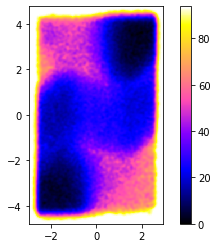

In [183]:
extent = [landscape.x.min(),landscape.x.max(),landscape.y.min(),landscape.y.max()]
plt.imshow(landscape.z,origin='lower',extent=extent,cmap='gnuplot2')
plt.colorbar()

### Initialize string

In [223]:
string = String.from_interpolation(-2,-4,2,4,20)
np.random.seed(0)

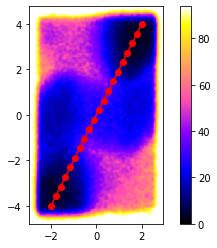

In [224]:
extent = [landscape.x.min(),landscape.x.max(),landscape.y.min(),landscape.y.max()]
plt.imshow(landscape.z,origin='lower',extent=extent,cmap='gnuplot2')
plt.plot(string.xdata,string.ydata,'o-',color='red')
plt.colorbar()

### Simulate

In [225]:
drift_factor = 0.001
sigma = 0.02 #for random walk
N = 20
t = 0

string_history = [(string.xdata.copy(),string.ydata.copy())]

for t in range(4000):
    string.random_walk(sigma,sigma)
    string.drift(landscape,drift_factor)
    string.untangle()
    string.reparameterize(N)
    string_history.append((string.xdata.copy(),string.ydata.copy()))

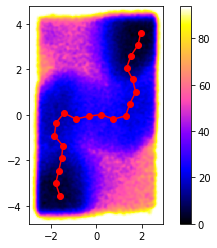

In [226]:
extent = [landscape.x.min(),landscape.x.max(),landscape.y.min(),landscape.y.max()]
plt.imshow(landscape.z,origin='lower',extent=extent,cmap='gnuplot2')
plt.plot(string.xdata,string.ydata,'o-',color='red')
plt.colorbar()

In [252]:
plt.plot(string.get_pmf(landscape))

### Animate !

In [227]:
string_history = np.array(string_history)

In [249]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import animation, rc
%matplotlib qt

def update_line(num, data, line):
    line.set_data(data[num])
    return line,

fig = plt.figure()

extent = [landscape.x.min(),landscape.x.max(),landscape.y.min(),landscape.y.max()]
plt.imshow(landscape.z,origin='lower',extent=extent,cmap='gnuplot2')
#plt.plot(string.xdata,string.ydata,'o-',color='red')
plt.colorbar()

s, = plt.plot([],[], 'o-',color='red')

line_ani = animation.FuncAnimation(fig, update_line, len(string_history), fargs=(string_history, s),
                                   interval=50, blit=True)